In [52]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import os


In [35]:
from google.colab import drive
drive.mount('/content/drive') # Mount to /content/drive which exists by default

# Now you can access your 'flowers' folder inside your Drive
image_path1 = '/content/drive/MyDrive/flowers'
class_names = os.listdir(image_path1)
num_class = len(class_names)

class_names

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['bougainvillea',
 'daisises',
 'gardenias',
 'garden_roses',
 'hibiscus',
 'hydrangeas',
 'lilies',
 'orchids',
 'peonies',
 'tulip']

In [36]:
import os

image_path = '/content/drive/MyDrive/flowers/tulip_00077.jpg'
print(os.path.exists(image_path))  # Cek apakah file ditemukan

False


In [37]:
import os

image_path1 = '/content/drive/MyDrive/flowers'
if os.path.exists(image_path1):
    print("Path ditemukan")
else:
    print("Path tidak ditemukan")


Path ditemukan


In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.3)


In [40]:
train_generator = train_datagen.flow_from_directory(image_path1,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (224,224),
                                                    subset='training',
                                                    shuffle=None)


Found 516 images belonging to 10 classes.


In [41]:
validation_generator = train_datagen.flow_from_directory(image_path1,
                                                         batch_size = 32,
                                                         class_mode = 'categorical',
                                                         target_size = (224,224),
                                                         subset='validation',
                                                         shuffle=None)

Found 217 images belonging to 10 classes.


In [42]:
true_class = validation_generator.classes
# true_class = true_class.tolist()
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [43]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
# Versi 1

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(num_class, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
epochs = 50

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5,
                    epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 200s 30s/step - accuracy: 0.1327 - loss: 0.9600 - val_accuracy: 0.1521 - val_loss: 0.4431
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 78s 18s/step - accuracy: 0.0042 - loss: 0.5473 - val_accuracy: 0.3272 - val_loss: 0.3050
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 14s/step - accuracy: 0.1474 - loss: 0.4098 - val_accuracy: 0.1014 - val_loss: 0.3368
Epoch 4/50
2/5 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.0859 - loss: 0.3275

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 12s/step - accuracy: 0.0812 - loss: 0.3403 - val_accuracy: 0.1935 - val_loss: 0.2945
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 134s 15s/step - accuracy: 0.2770 - loss: 0.2822 - val_accuracy: 0.1751 - val_loss: 0.3457
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 73s 17s/step - accuracy: 0.2762 - loss: 0.3284 - val_accuracy: 0.2442 - val_loss: 0.2996
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 59s 13s/step - accuracy: 0.0873 - loss: 0.3765 - val_accuracy: 0.2396 - val_loss: 0.3123
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 10s/step - accuracy: 0.0875 - loss: 0.3700 - val_accuracy: 0.4101 - val_loss: 0.2581
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 14s/step - accuracy: 0.2316 - loss: 0.3224 - val_accuracy: 0.3456 - val_loss: 0.2580
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 15s/step - accuracy: 0.2741 - loss: 0.3067 - val_accuracy: 0.4009 - val_loss: 0.2391
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 62s 14s/step - accuracy: 0.1225 - loss: 0.3138 - val_accuracy: 0.6129 - val_loss: 0.2142
Epoch 12

In [46]:
# Prediksi

pred = model.predict(validation_generator)
predited_class = pred.argmax(axis=-1)
predited_class


7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step


array([0, 0, 9, 0, 0, 9, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 0, 0, 8, 2, 9, 3, 8, 9, 2, 0, 8, 8, 8, 0, 0, 2, 2, 9,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 3, 7, 7, 7, 7, 4, 3, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 3, 8,
       8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [47]:
true_class = validation_generator.classes
# true_class = true_class.tolist()
true_class


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [48]:
# Evaluasi
from sklearn.metrics import classification_report
print(classification_report(true_class, predited_class))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.96      1.00      0.98        24
           2       1.00      0.23      0.37        22
           3       0.61      1.00      0.75        23
           4       0.95      0.95      0.95        22
           5       1.00      0.83      0.91        18
           6       1.00      0.92      0.96        24
           7       1.00      0.68      0.81        19
           8       0.78      0.82      0.80        22
           9       0.70      1.00      0.82        21

    accuracy                           0.82       217
   macro avg       0.87      0.82      0.81       217
weighted avg       0.87      0.82      0.81       217



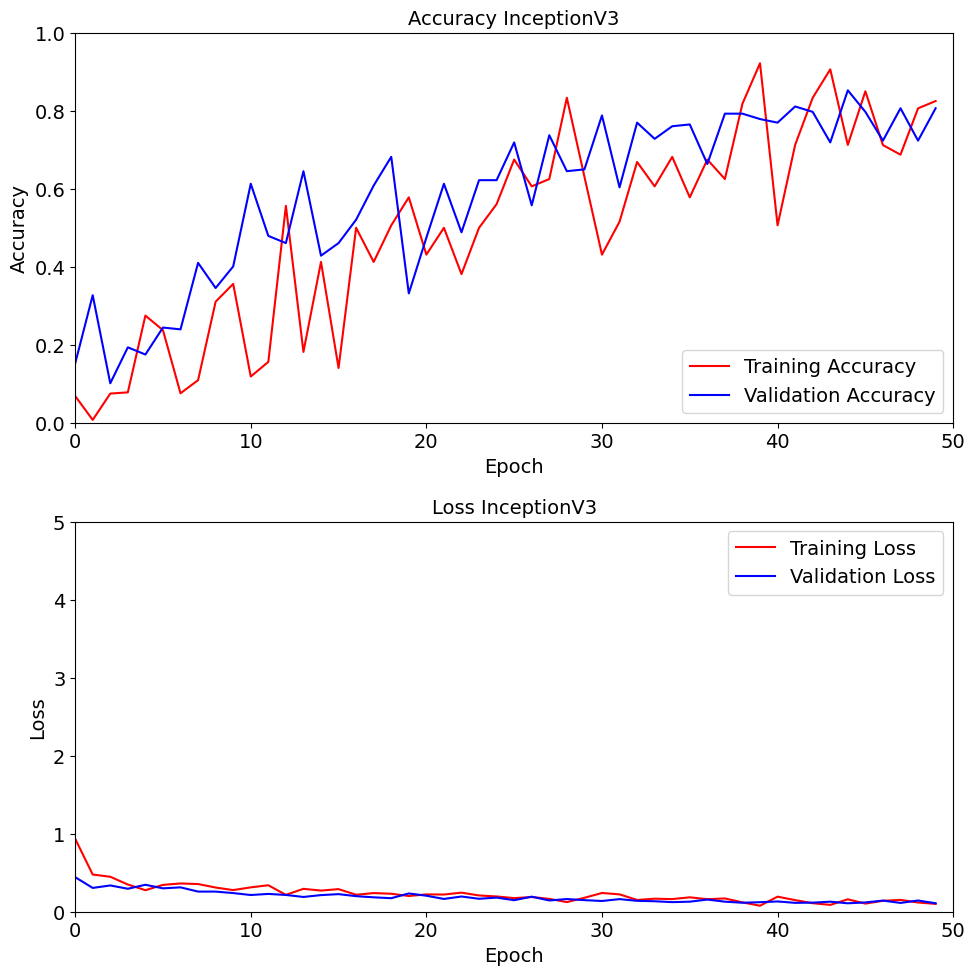

In [49]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=14)  # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy InceptionV3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.title('Loss InceptionV3')

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()


In [50]:
# Menggunakan arsitektur ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
ttl = 'Arsitektur ResNet50'

# ResNet50
pre_trained_model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
resnet_model = Sequential()
resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_class, activation='softmax'))

resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = resnet_model.fit(train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=epochs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 107s 20s/step - accuracy: 0.0451 - loss: 64.2465 - val_accuracy: 0.1106 - val_loss: 84.1118
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 122s 29s/step - accuracy: 0.0695 - loss: 70.9368 - val_accuracy: 0.1014 - val_loss: 46.1509
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 19s/step - accuracy: 0.0102 - loss: 37.7889 - val_accuracy: 0.1060 - val_loss: 25.1334
Epoch 4/50
2/5 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.0000e+00 - loss: 45.4660

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 96s 22s/step - accuracy: 0.0000e+00 - loss: 39.5217 - val_accuracy: 0.1014 - val_loss: 21.2096
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 98s 20s/step - accuracy: 0.0000e+00 - loss: 14.5368 - val_accuracy: 0.0829 - val_loss: 18.1313
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 28s/step - accuracy: 0.2555 - loss: 15.8984 - val_accuracy: 0.1106 - val_loss: 12.9380
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 27s/step - accuracy: 0.1452 - loss: 10.8431 - val_accuracy: 0.1152 - val_loss: 8.4341
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 63s 14s/step - accuracy: 0.0000e+00 - loss: 15.0893 - val_accuracy: 0.0968 - val_loss: 7.8432
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 133s 28s/step - accuracy: 0.1434 - loss: 12.6078 - val_accuracy: 0.1060 - val_loss: 4.5937
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 19s/step - accuracy: 0.0000e+00 - loss: 4.1291 - val_accuracy: 0.1244 - val_loss: 5.0181
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 27s/step - accuracy: 0.1717 - loss: 4.7798 - val_accuracy: 0.0876

In [53]:
# Prediksi

prediction = resnet_model.predict(validation_generator, steps=len(validation_generator), verbose=1)
prediction = resnet_model.predict(validation_generator)

# predited_class = list(np.argmax(prediction, axis=1))

predited_class = prediction.argmax(axis=-1)

predited_class


7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step


array([4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 8, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(true_class, predited_class))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        23
           4       0.11      1.00      0.19        22
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        19
           8       0.11      0.05      0.06        22
           9       0.00      0.00      0.00        21

    accuracy                           0.11       217
   macro avg       0.02      0.10      0.03       217
weighted avg       0.02      0.11      0.03       217



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


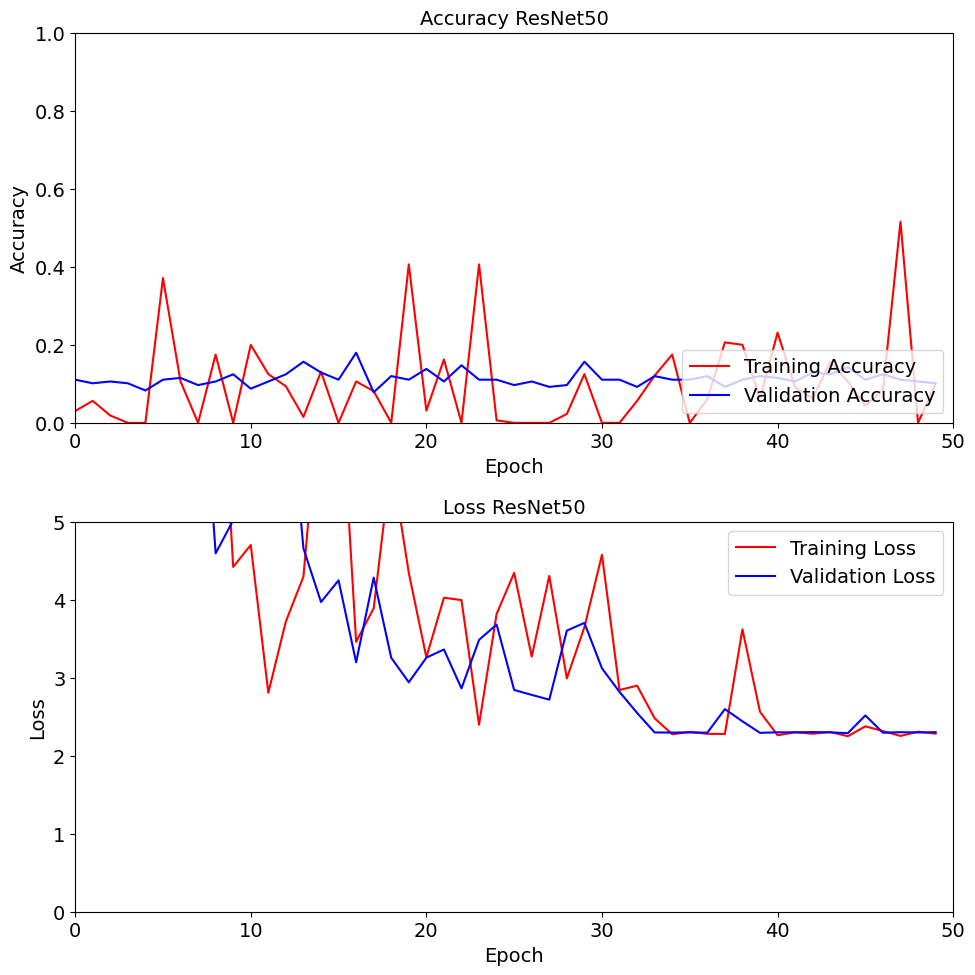

In [55]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=14)  # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy ResNet50')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 5])
plt.legend(loc='upper right')
plt.title('Loss ResNet50')

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()


In [56]:
# Arsitektur Xception
from tensorflow.keras.applications.xception import Xception

pre_trained_model = Xception(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [57]:
model = Sequential()
model.add(pre_trained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
epochs = 50

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5,
                    epochs=epochs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 124s 24s/step - accuracy: 0.1705 - loss: 102.8376 - val_accuracy: 0.1659 - val_loss: 125.3039
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 108s 24s/step - accuracy: 0.3428 - loss: 84.0700 - val_accuracy: 0.1797 - val_loss: 34.2307
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 102s 24s/step - accuracy: 0.0638 - loss: 39.2855 - val_accuracy: 0.2258 - val_loss: 7.1817
Epoch 4/50
2/5 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.0000e+00 - loss: 15.3249 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 17s/step - accuracy: 0.0000e+00 - loss: 13.4049 - val_accuracy: 0.1198 - val_loss: 4.0735
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 148s 23s/step - accuracy: 0.4626 - loss: 1.7418 - val_accuracy: 0.2396 - val_loss: 2.0178
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 128s 30s/step - accuracy: 0.1187 - loss: 2.2405 - val_accuracy: 0.2765 - val_loss: 1.8976
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 104s 24s/step - accuracy: 0.1536 - loss: 2.1573 - val_accuracy: 0.2488 - val_loss: 1.8304
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 99s 23s/step - accuracy: 0.1375 - loss: 2.3015 - val_accuracy: 0.2857 - val_loss: 1.7831
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 120s 25s/step - accuracy: 0.0556 - loss: 2.2582 - val_accuracy: 0.2166 - val_loss: 1.7651
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 130s 31s/step - accuracy: 0.4941 - loss: 1.4218 - val_accuracy: 0.2442 - val_loss: 1.7589
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 96s 21s/step - accuracy: 0.1379 - loss: 2.0073 - val_accuracy: 0.3594 - val_loss: 1.6914

KeyboardInterrupt: 